# Pipeline Object Test

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import utils
import configparser

In [26]:
#getting data
raw_df = pd.read_csv('/Users/emi/Documents/GitHub/ROB-EDA/data/semi_raw_data/df_30percent_variance_exclusion.csv')
keeplist = keeplist = ['Driving.Frequency', 'Age', 'Education', 'SES', 'Driving.Risk.General', 'CVSCALE.PD_Total', 'BFI.extraversion', 
            'Control_Total', 'Anxiety.As.Passenger', 'Risk.Willingness.General', 'Gender', 'BFI.conscientiousness', 
            'BFI.agreeableness', 'Info.processing_Total', 'CVSCALE.UA_Total', 'Politics', 'BFI.openness', 
            'CVSCALE.C_Total', 'Self.Esteem_Total', 'Overall.Risk.Benefit', 'NFC.Ambiguity_Total', 'BFI.neuroticism', 
            'NFC.Predictability_Total', 'NumOfCollisions', 'Risk.Benefit.Model_1', 'Risk.Benefit.Model_2', 
            'Risk.Benefit.Model_3', 'Risk.Benefit.Model_4', 'Risk.Benefit.Model_5', 'Risk.Benefit.Model_6', 
            'Risk.Benefit.Model_8', 'Risk.Benefit.Model_9', 'Risk.Benefit.Model_10', 'Risk.Benefit.Model_11', 
            'Risk.Benefit.Model_12', 'Risk.Benefit.Model_14', 'Risk.Benefit.Model_15',  'Risk.Benefit.Model_17', 
            'Composite.AV.Trust_16', 'Composite.AV.Trust_1', 'Composite.AV.Trust_3', 'Composite.AV.Trust_6', 
            'Composite.AV.Trust_22', 'AV.Priors_1', 'AV.Priors_2', 'AV.Priors_3', 'AV.Priors_4', 'AV.Priors_5', 
            'AV.Priors_6', 'AV.Priors_7', 'AV.Priors_8', 'AV.Priors_9', 'AV.Priors_10', 'AV.feasibility', 'Prior.AV.Exp', 
            'AV.Functions_1', 'AV.Functions_2', 'AV.Functions_3', 'AV.Functions_4', 'AV.Functions_5', 'AV.Functions_6', 
            'AV.Functions_7', 'AV.Functions_8', 'Trust.Institutions_1', 'Trust.Institutions_2', 'Trust.Institutions_3', 
            'Tech.Affinity_1', 'Tech.Affinity_2', 'Tech.Affinity_3', 'Tech.Affinity_4', 'Tech.self.efficacy_1', 
            'Tech.self.efficacy_2', 'Tech.self.efficacy_3', 'Tech.self.efficacy_4', 'Tech.self.efficacy_5', 
            'MDSI.Driving.Style_1', 'MDSI.Driving.Style_2', 'MDSI.Driving.Style_3', 'MDSI.Driving.Style_4', 
            'MDSI.Driving.Style_5', 'MDSI.Driving.Style_6', 'MDSI.Driving.Style_7', 'MDSI.Driving.Style_8', 
            'MDSI.Driving.Style_9', 'MDSI.Driving.Style_10', 'MDSI.Driving.Style_11', 'MDSI.Driving.Style_12', 
            'MDSI.Driving.Style_13', 'MDSI.Driving.Style_14', 'MDSI.Driving.Style_15', 'MDSI.Driving.Style_16', 
            'MDSI.Driving.Style_17', 'MDSI.Driving.Style_18', 'MDSI.Driving.Style_19', 'MDSI.Driving.Style_20', 
            'MDSI.Driving.Style_21', 'MDSI.Driving.Style_22', 'MDSI.Driving.Style_23', 'MDSI.Driving.Style_24', 
            'MDSI.Driving.Style_25', 'MDSI.Driving.Style_26', 'MDSI.Driving.Style_27', 'MDSI.Driving.Style_28', 
            'MDSI.Driving.Style_29', 'MDSI.Driving.Style_30', 'MDSI.Driving.Style_31', 'MDSI.Driving.Style_32', 
            'MDSI.Driving.Style_33', 'MDSI.Driving.Style_34', 'MDSI.Driving.Style_36', 'MDSI.Driving.Style_37', 
            'MDSI.Driving.Style_38', 'MDSI.Driving.Style_39', 'MDSI.Driving.Style_40', 'MDSI.Driving.Style_41', 
            'MDSI.Driving.Style_42', 'MDSI.Driving.Style_43', 'Driving.Cognitions_1', 'Driving.Cognitions_2', 
            'Driving.Cognitions_3', 'Driving.Cognitions_4', 'Driving.Cognitions_5', 'Driving.Cognitions_6', 
            'Driving.Cognitions_7', 'Driving.Cognitions_8', 'Driving.Cognitions_9', 'Driving.Cognitions_10', 
            'Driving.Cognitions_11', 'Driving.Cognitions_12', 'Driving.Cognitions_13', 'Composite.Trust.Narrow.Combined']

config = configparser.ConfigParser()
config.read('config.ini')
df = raw_df[keeplist]
df.dropna(axis=0, inplace=True)
target_column ='Composite.Trust.Narrow.Combined'

def encode(x):
    threshold = 18
    if x >= threshold:
        return 1
    else:
        return 0
    
df.loc[:, f'{target_column}.encoded'] = df[target_column].apply(encode)


/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_2847/1471610224.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)
/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_2847/1471610224.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'{target_column}.encoded'] = df[target_column].apply(encode)


## Preprocessing

In [27]:
#scale and split data 
X = df.drop(columns=[target_column, f'{target_column}.encoded'])
y = df[f'{target_column}.encoded']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#make pipeline w/ lda and nb
pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis()),  
    ('nb', GaussianNB())  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

#perf metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr')

print(f'LDA + Naive Bayes: Acc: {accuracy}, Prec: {precision}, Rec: {recall}, BALANCED ACC: {balanced_acc}, F1: {f1} , AUC ROC: {auc_roc}')




LDA + Naive Bayes: Acc: 0.8705882352941177, Prec: 0.870050573578389, Rec: 0.8703703703703705, BALANCED ACC: 0.8703703703703705, F1: 0.8701969797467183 , AUC ROC: 0.9498765432098766


## SHAP

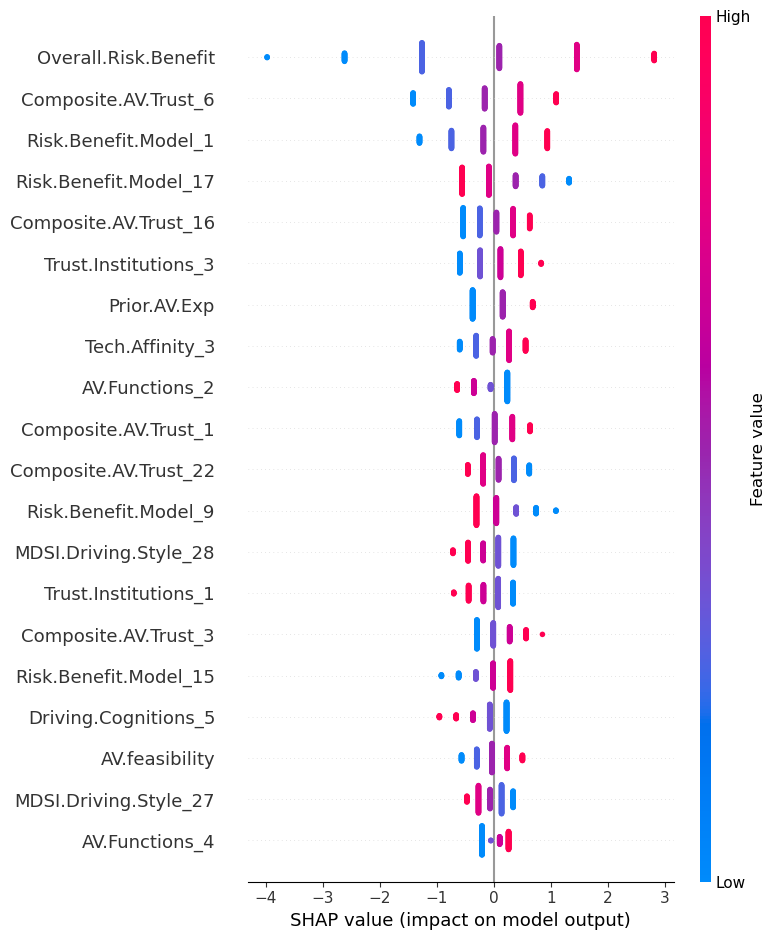

In [32]:
#SHAP
lda_model = pipeline.named_steps['lda']
explainer = shap.LinearExplainer(lda_model, X_train)
shap_values = explainer(X_test)

#summary plot
shap.summary_plot(shap_values, X_test, plot_type="dot")

# NB LDA + SHAP - BASELINE FEATURES - 5 kfolds

In [3]:
#getting test/train from kfolds 
k = 5
enc_target = 'Composite.Trust.Narrow.Combined.encoded'

#iterate through every fold 
for i in range(1, k+1):
        train_df = pd.read_csv(f'data/kfold/train/train_fold_{i}.csv')
        test_df = pd.read_csv(f'data/kfold/test/test_fold_{i}.csv')
        print(f'Distribution of trust classes in training set : {train_df[enc_target].value_counts()}')
        print(f'Distribution of trust classes in test set : {test_df[enc_target].value_counts()}')

        #keeplist for BASELINE FEATURES 
        keeplist = ['Composite.Trust.Narrow.Combined', 'Gender', 'Age', 'Education', 'Driver.s.License', 'LicenseAge', 'Driving.Frequency.Linear', 'Tech.Affinity_1', 'AV.Priors_Total_Expertise', 'AV.Functions_Total', 'Prior.AV.Exp', 'Risk.Benefit.Model_1', 'Risk.Benefit.Model_2', 'Risk.Benefit.Model_9', 'Risk.Benefit.Model_13', 'Risk.Benefit.Model_18', 'MDSI.Driving.Style_16', 'MDSI.Driving.Style_10', 'MDSI.Driving.Style_9']

        config = configparser.ConfigParser()
        config.read('config.ini')
        train_df = train_df[keeplist]
        test_df = test_df[keeplist]
        df.dropna(axis=0, inplace=True)
        y_train = train_df[f'{y_str}.encoded']
        X_train = train_df.drop(columns =[f'enc_target', 'Composite.Trust.Narrow.Combined'], axis=1)
        y_test = test_df[f'{y_str}.encoded']
        X_test = test_df.drop(columns = [f'enc_target', 'Composite.Trust.Narrow.Combined'], axis=1)

        #make pipeline w/ lda and nb
        pipeline = Pipeline([
        ('lda', LinearDiscriminantAnalysis()),  
        ('nb', GaussianNB())  
        ])

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1]

        #perf metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr')

        print(f'LDA + Naive Bayes: Acc: {accuracy}, Prec: {precision}, Rec: {recall}, BALANCED ACC: {balanced_acc}, F1: {f1} , AUC ROC: {auc_roc}')

                

Distribution of trust classes in training set : 1    787
0    787
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in test set : 1    197
0    190
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in training set : 1    787
0    787
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in test set : 1    197
0    190
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in training set : 1    787
0    787
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in test set : 1    197
0    190
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in training set : 0    787
1    787
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribution of trust classes in test set : 1    197
0    190
Name: Composite.Trust.Narrow.Combined.encoded, dtype: int64
Distribu